<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 4: Discrete-Time Systems<br/>
    <small>Date:</small><br/>
    <small>Section:<s/small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]|Jin Hyung Park | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**: *One-sided, with cover sheet, answers are in the same order as questions in the lab*||||
|**Ability to process given signals (20 pts)**: *Import signal, plot signal, filter signal*||||
|**Understanding and ability to implement difference equations (60 pts)**: *Draw system diagram, calculate impulse response, find inverse system answer ’discuss/explain’ questions*||||
|**Ability to test for linearity and time-invariance of systems (20 pts)**: *Supporting plots with clear indication of the proof*||||

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [176]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

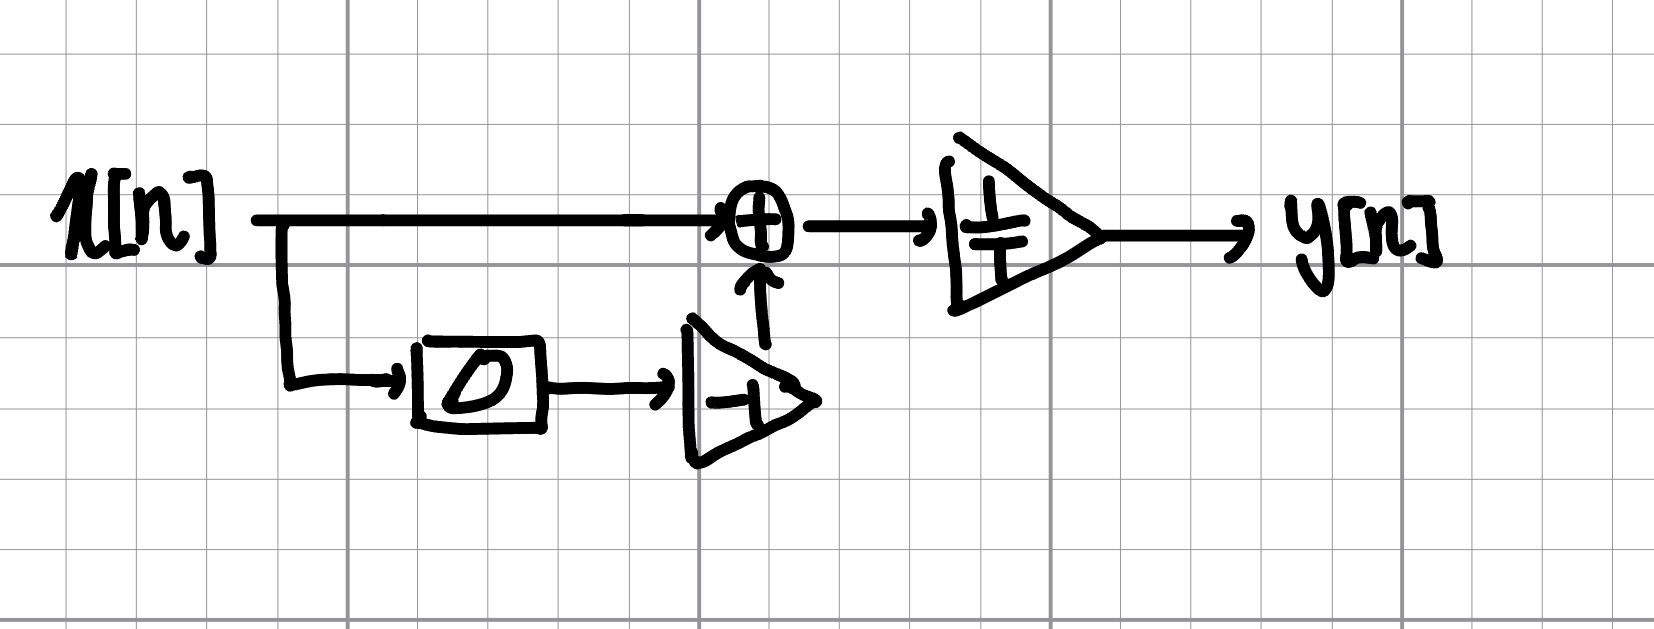

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<StemContainer object of 3 artists>

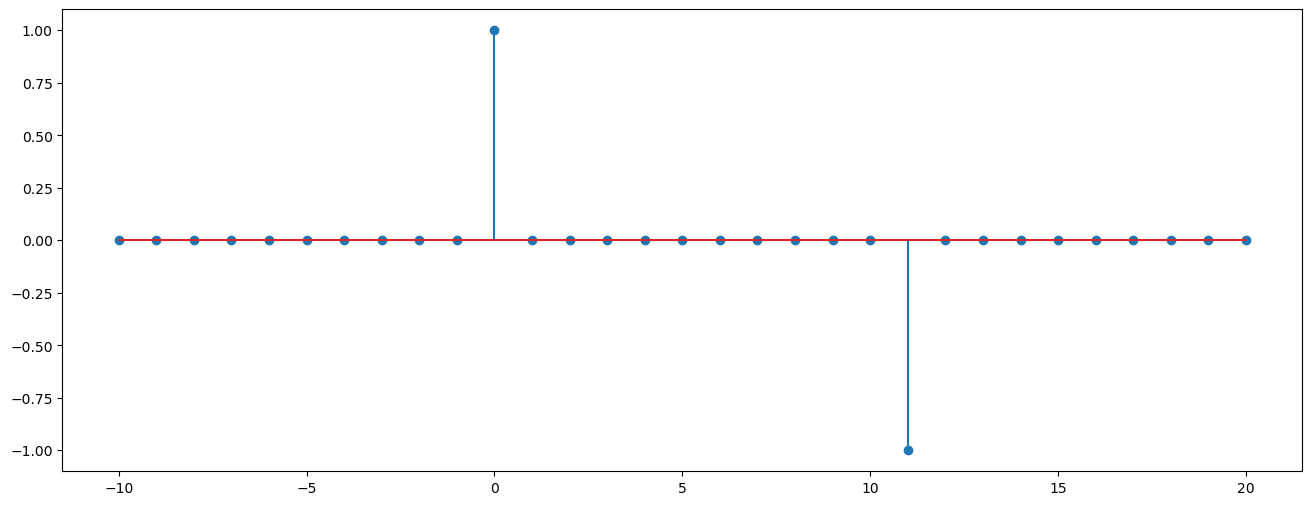

In [177]:
# write your code here
N = 10

ten_twen = np.arange(-10, 21)
u = (ten_twen>=0).astype(int)
u2 = (ten_twen>=1).astype(int)
shift_n = (ten_twen>=(N + 1)).astype(int)
shift_n2 = (ten_twen>=(N + 2)).astype(int)
input_diff_signal = u - shift_n
shift_diff_signal = u2 - shift_n2
output1 = input_diff_signal - shift_diff_signal
plt.stem(ten_twen, output1)

**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

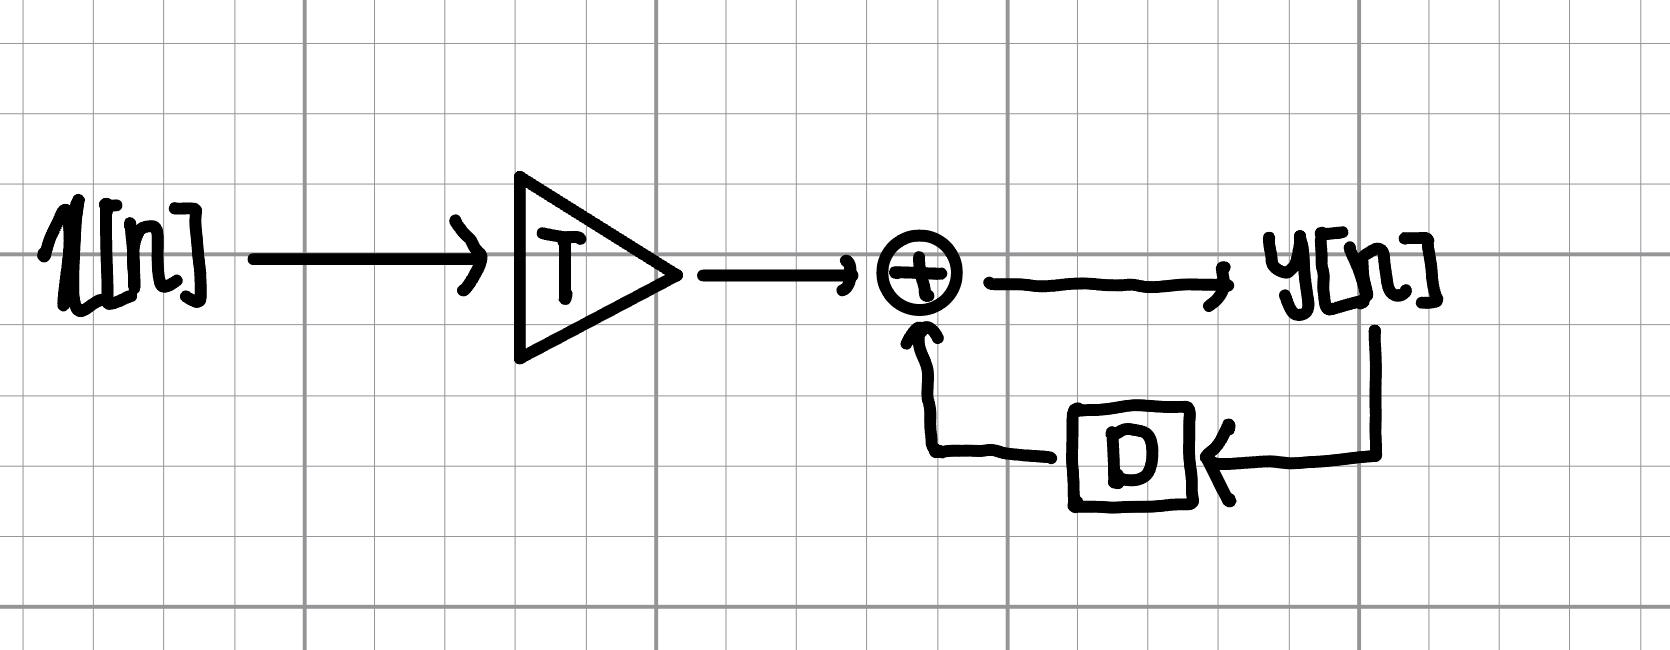

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<StemContainer object of 3 artists>

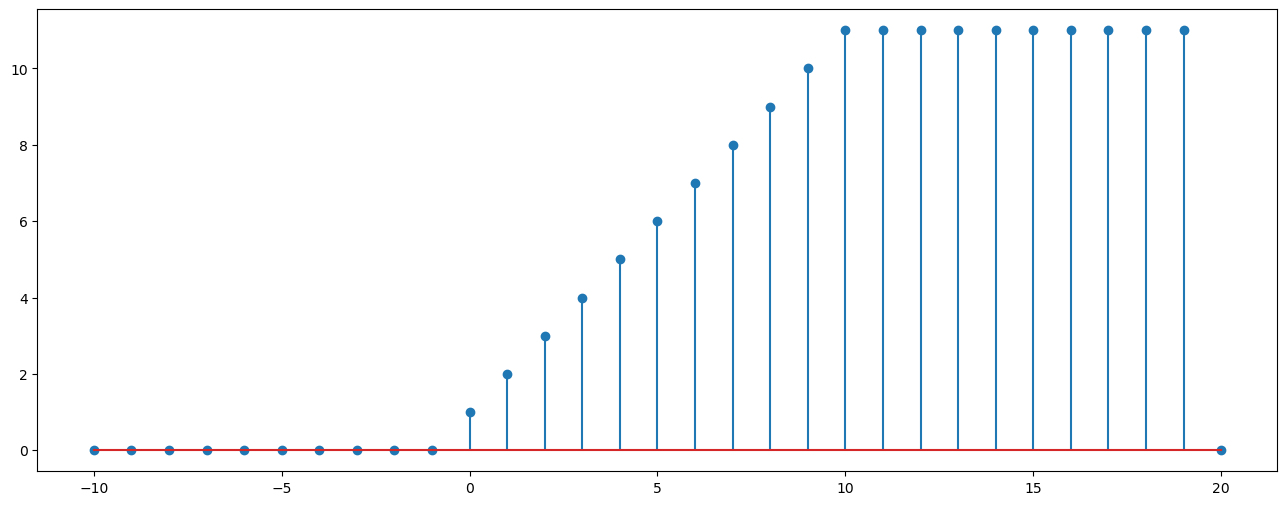

In [178]:
# write your code here
# y[n] = y((n-1)T) + x(nT)T

N = 10
ten_twen = np.arange(-10, 21)

u = (ten_twen>=0).astype(int)
shift_n = (ten_twen>=(N + 1)).astype(int)
input_diff_signal = u - shift_n # x[n] = u[n] - u[n - (N + 1)]

integr_y = np.zeros_like(input_diff_signal)

for n in range (1, 30):
    integr_y[n] = integr_y[n - 1] + input_diff_signal[n]

plt.stem(ten_twen, integr_y)


**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

In [179]:
# write your code here
T1 = 0.1
t1 = np.arange(0,10+T1,T1)
input_sin_diff1 = np.diff(np.sin(2*np.pi*t1), prepend=0) / T1
print(input_sin_diff1)

[ 0.00000000e+00  5.87785252e+00  3.63271264e+00  0.00000000e+00
 -3.63271264e+00 -5.87785252e+00 -5.87785252e+00 -3.63271264e+00
 -1.11022302e-15  3.63271264e+00  5.87785252e+00  5.87785252e+00
  3.63271264e+00 -1.11022302e-15 -3.63271264e+00 -5.87785252e+00
 -5.87785252e+00 -3.63271264e+00  2.22044605e-15  3.63271264e+00
  5.87785252e+00  5.87785252e+00  3.63271264e+00 -7.77156117e-15
 -3.63271264e+00 -5.87785252e+00 -5.87785252e+00 -3.63271264e+00
 -3.33066907e-15  3.63271264e+00  5.87785252e+00  5.87785252e+00
  3.63271264e+00  5.55111512e-15 -3.63271264e+00 -5.87785252e+00
 -5.87785252e+00 -3.63271264e+00 -5.55111512e-15  3.63271264e+00
  5.87785252e+00  5.87785252e+00  3.63271264e+00  5.55111512e-15
 -3.63271264e+00 -5.87785252e+00 -5.87785252e+00 -3.63271264e+00
  3.33066907e-15  3.63271264e+00  5.87785252e+00  5.87785252e+00
  3.63271264e+00 -3.33066907e-15 -3.63271264e+00 -5.87785252e+00
 -5.87785252e+00 -3.63271264e+00  2.33146835e-14  3.63271264e+00
  5.87785252e+00  5.87785

**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

In [180]:
# write your code here
T2 = 0.001
t2 = np.arange(0,10+T2,T2)
input_sin_diff2 = np.diff(np.sin(2*np.pi*t2), prepend=0) / T2
print(input_sin_diff2)

[0.         6.28314397 6.28289592 ... 6.28239983 6.28289592 6.28314397]


**7. Compare the results in Q5 and Q6.**

With T = 0.1, the derivative shows larger variation and more noticeable error, including amplitude mismatch compared to the true derivative. At T = 0.001, the variation is much smaller and the approximation error is significantly reduced, resulting in a derivative that more closely matches the true continuous-time derivative.

<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

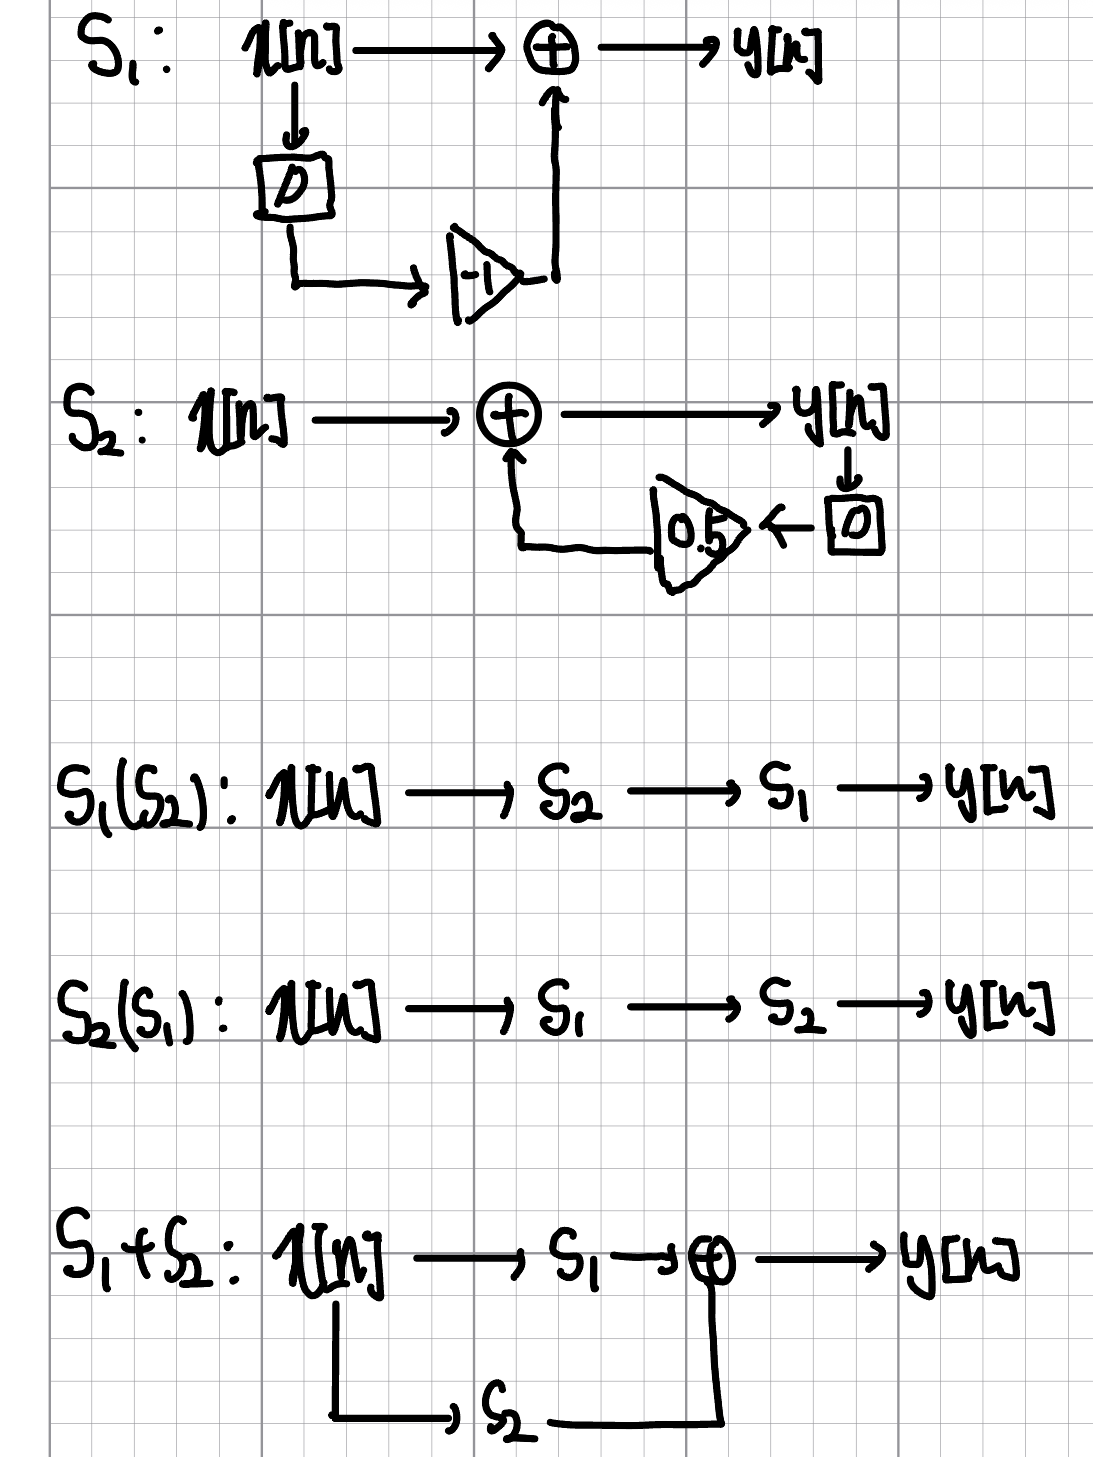

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [181]:
# write your code here
def S1(x):
    y1 = np.zeros_like(x, dtype=float)
    x_len1 = len(x)
    for n1 in range(x_len1):
        if (n1 == 0):
            y1[n1] = x[n1]
        else:
            y1[n1] = x[n1] - x[n1 - 1]
    return y1

def S2(x):
    y2 = np.zeros_like(x, dtype=float)
    x_len2 = len(x)
    for n2 in range(x_len2):
        if (n2 == 0):
            y2[n2] = x[n2]
        else:
            y2[n2] = 0.5 * y2[n2 - 1] + x[n2]
    return y2

**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

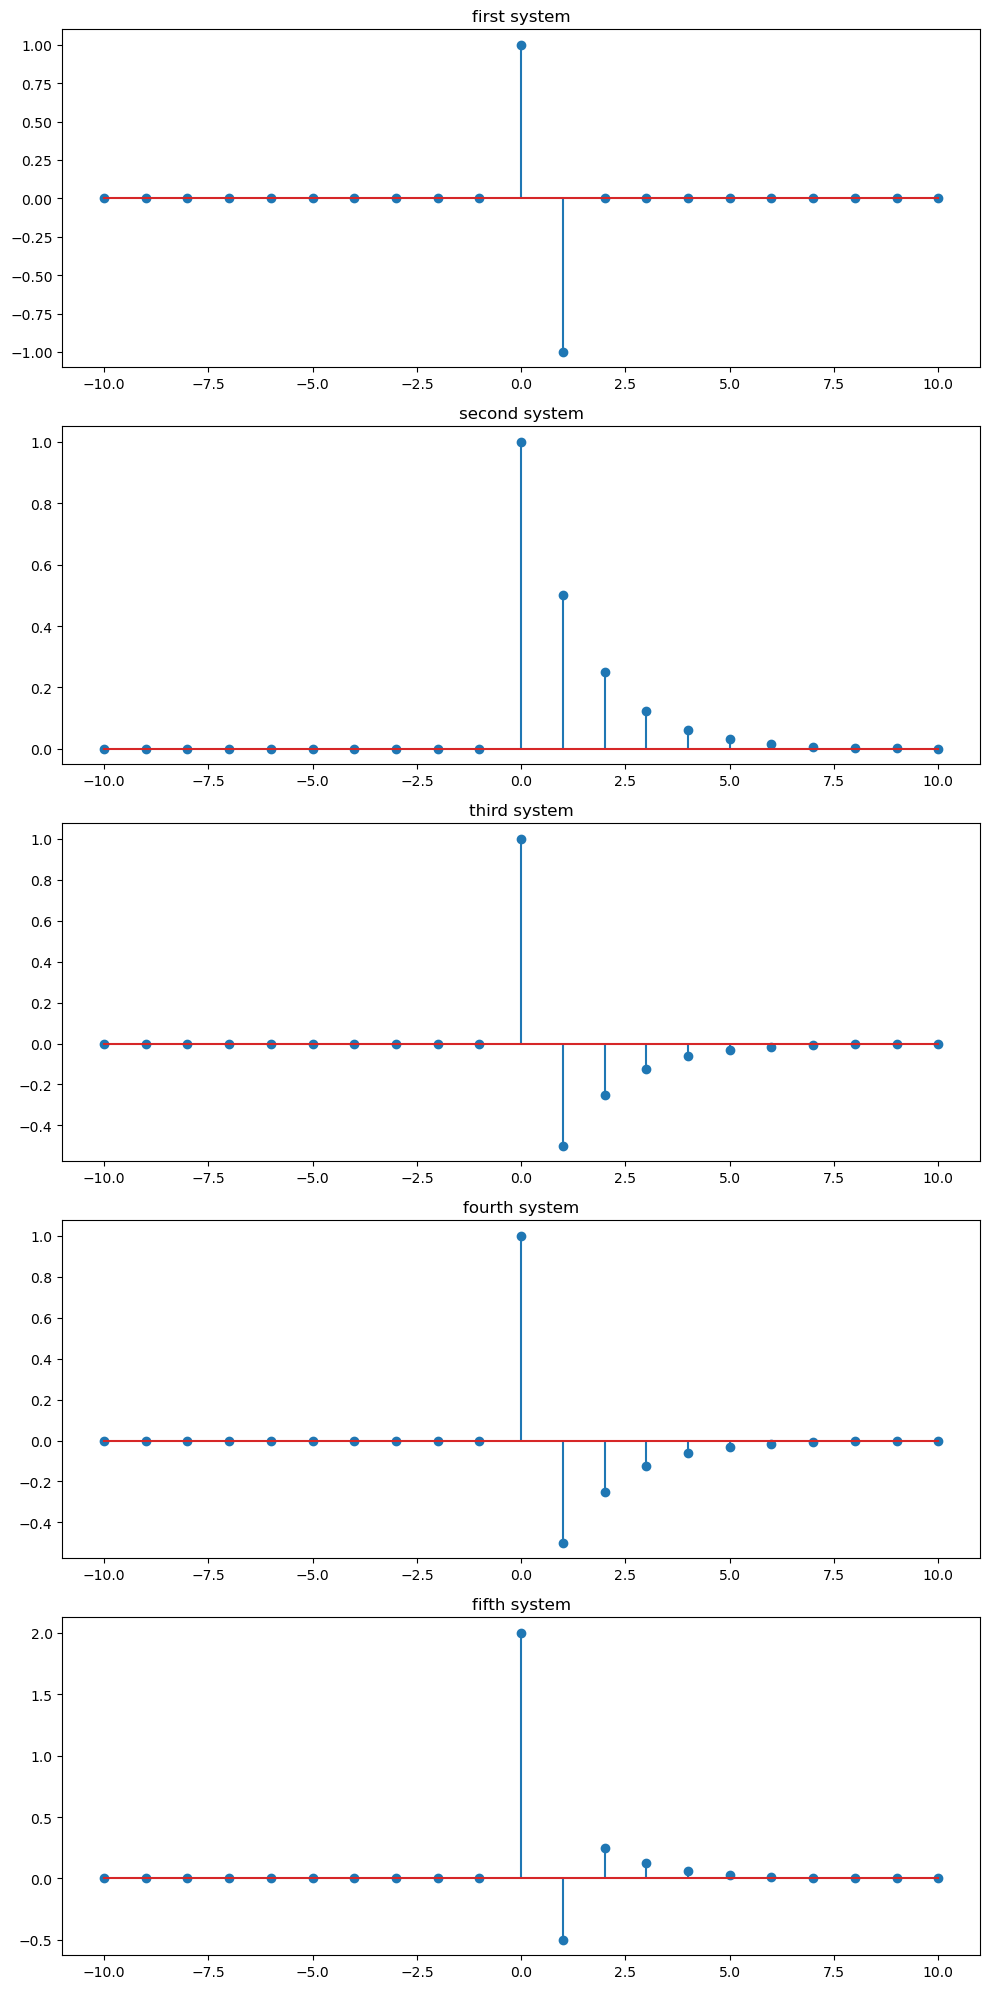

In [182]:
# write your code here
impul_arange = np.arange(-10, 11)
imp = (impul_arange == 0).astype(float)
first_sys = S1(imp)
second_sys = S2(imp)
third_sys = S1(second_sys)
fourth_sys = S2(first_sys)
fifth_sys = first_sys + second_sys

plt.figure(figsize=(10,20))

plt.subplot(5,1,1)
plt.stem(impul_arange, first_sys)
plt.title("first system")

plt.subplot(5,1,2)
plt.stem(impul_arange, second_sys)
plt.title("second system")

plt.subplot(5,1,3)
plt.stem(impul_arange, third_sys)
plt.title("third system")

plt.subplot(5,1,4)
plt.stem(impul_arange, fourth_sys)
plt.title("fourth system")

plt.subplot(5,1,5)
plt.stem(impul_arange, fifth_sys)
plt.title("fifth system")

plt.tight_layout()

**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [183]:
# write your code here
audio, fs = sf.read("music.au")

**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [184]:
# write your code here
ipd.Audio(audio, rate=fs)

**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [185]:
# write your code here
first_filter = S1(audio)
second_filter = S2(audio)
display(ipd.Audio(first_filter, rate=fs))
display(ipd.Audio(second_filter, rate=fs))

**5. How do the filters change the sound of the audio signals? Explain your observations.**

For S1, it boosts high frequency components while filtering low-frequency components. For S2, it reverses of filter 1, indication that it reduces pitch at hight frequency while preserving the amplitude at low frequencies

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

a = 1 b = -0.5

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [186]:
# write your code here
def S3(x):
    y3 = np.zeros_like(x, dtype=float)
    x_len3 = len(x)
    for n3 in range(x_len3):
        if (n3 == 0):
            y3[n3] = x[n3]
        else:
             y3[n3] = x[n3] - 0.5 * x[n3 - 1]
    return y3

**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

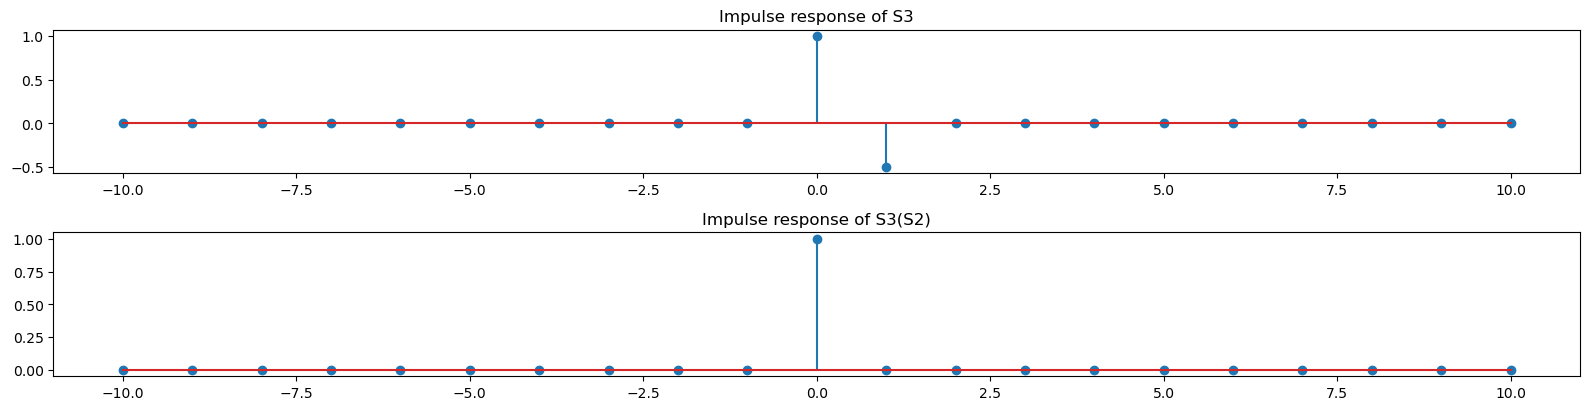

In [187]:
# write your code here
plt.subplot(3,1,1)
third_filter = S3(imp)
plt.stem(impul_arange,third_filter)
plt.title("Impulse response of S3")
plt.subplot(3,1,2)
third_filter_sec = S3(second_sys)
plt.stem(impul_arange,third_filter_sec)
plt.title("Impulse response of S3(S2)")
plt.tight_layout()

<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [188]:
# write your code here
from bboxes import bbox1, bbox2, bbox3

**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

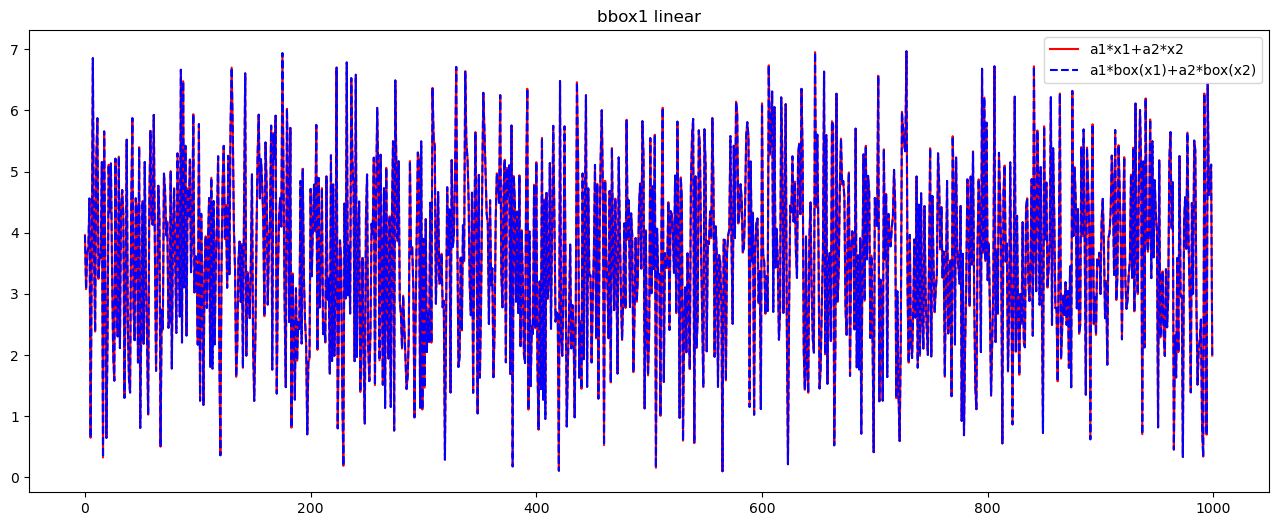

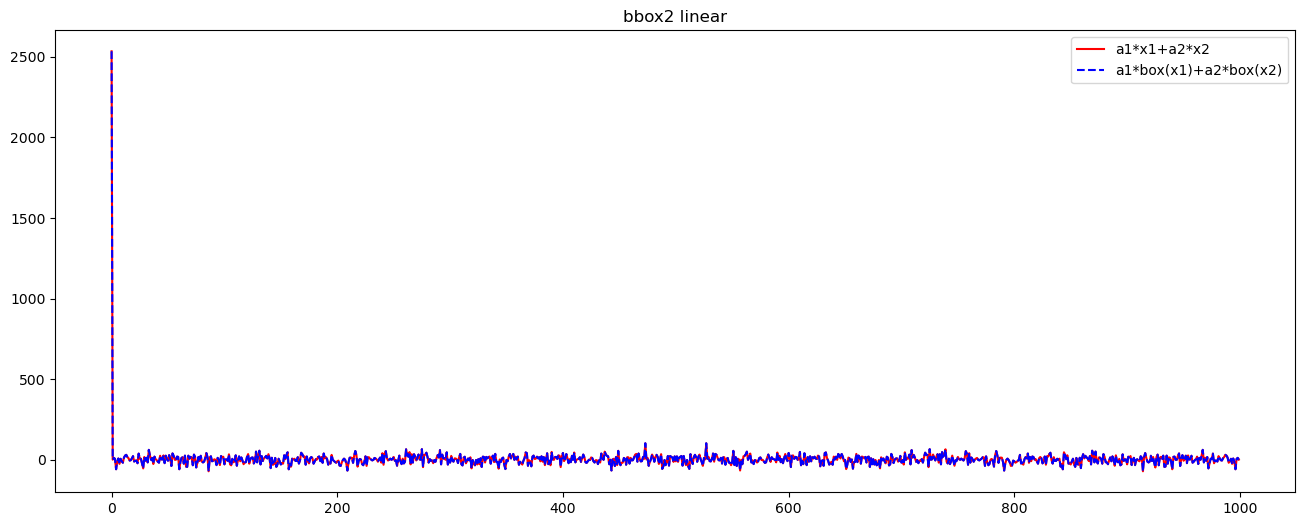

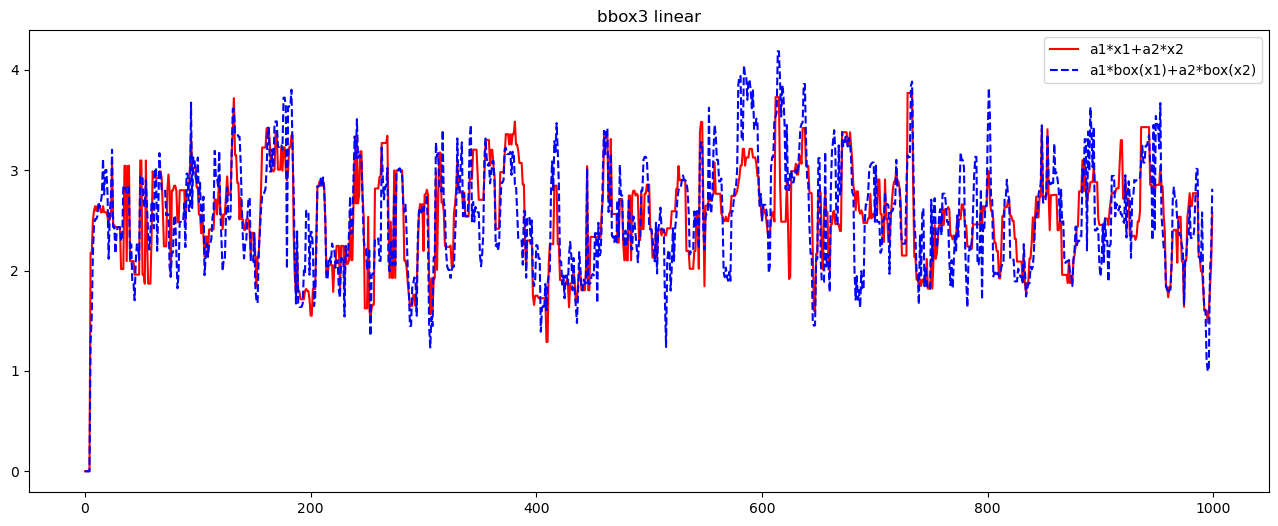

In [189]:
# write your code here

# Testing linear

a1 = 2
a2 = 3
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
box_list = [bbox1, bbox2, bbox3]

for box_index,box in enumerate(box_list):
    plt.figure()
    linear_y = box(a1*x1 + a2*x2)
    linear_x = a1*box(x1) + a2*box(x2)
    plt.plot(linear_y, color='red', label="a1*x1+a2*x2")
    plt.plot(linear_x, color='blue', linestyle='--', label="a1*box(x1)+a2*box(x2)")
    plt.title(f"bbox{box_index + 1} linear")
    plt.legend()

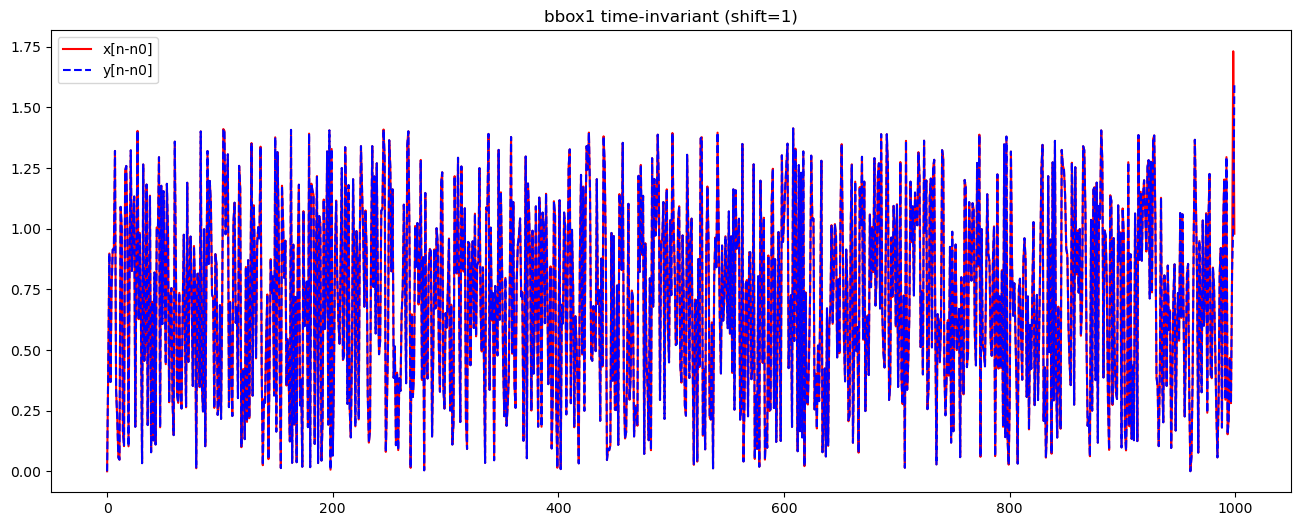

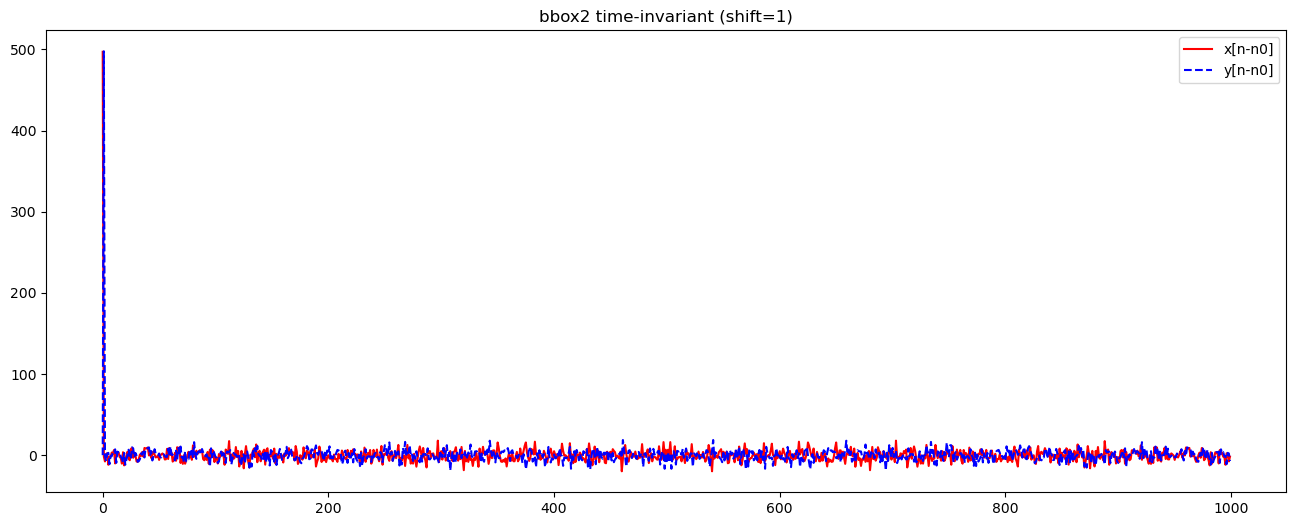

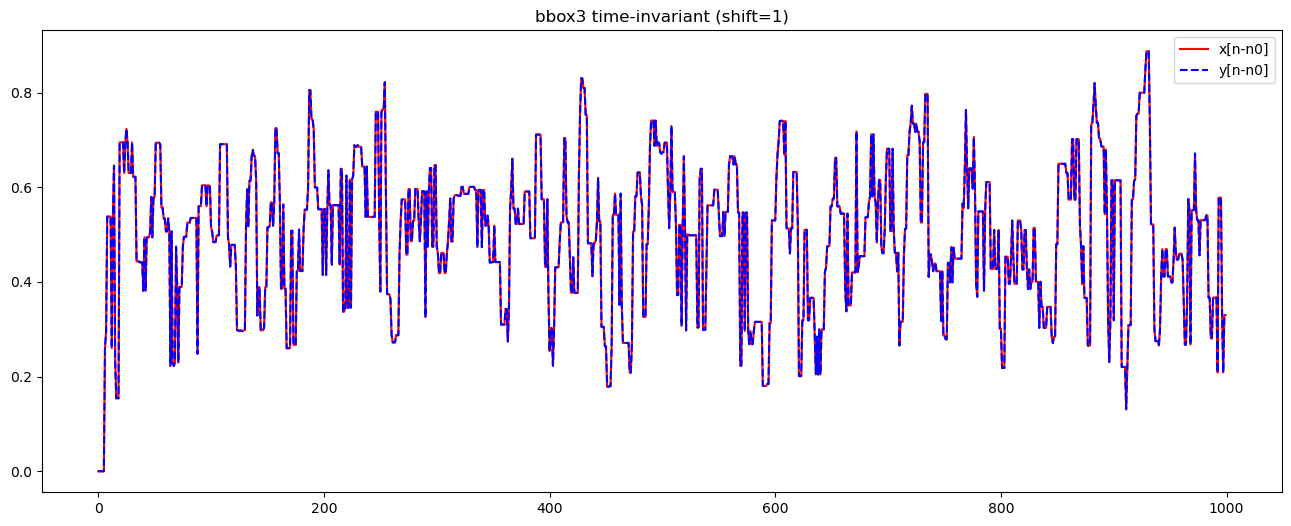

In [190]:
def whet_shift(input_x, shift):
    
    y_shift = np.zeros_like(input_x)
    if shift > 0:        
        y_shift[shift:] = input_x[:len(input_x)-shift]
    elif shift < 0:        
        k = -shift
        y_shift[:len(input_x)-k] = input_x[k:]
    return y_shift

x_shift = np.random.rand(1000)
shifts = [1]   
box_list = [bbox1, bbox2, bbox3]

for box_index, box in enumerate(box_list, start=1):
    y = box(x_shift)  

    for shift in shifts:
        y_after_shift_input = box(whet_shift(x_shift, shift))   
        y_shift_after_system = whet_shift(y, shift)       
        plt.figure()
        plt.plot(y_after_shift_input, color='red', label="x[n-n0]")
        plt.plot(y_shift_after_system, color='blue', linestyle='--', label="y[n-n0]")
        plt.title(f"bbox{box_index} time-invariant (shift={shift})")
        plt.legend()

**2. State which system is non-linear and which system is time-varying.**


non-linear: bbox3
time-varying: bbox2

**3. Explain how the plots support your conclusion.**

The graphs used to test linearity show the input and output of each system. If the two outputs overlap, this indicates that the system is linear. However, for bbox3, there is a significant mismatch between the two outputs, which shows that it is non-linear.

Similarly, for the time-invariance test using a shift of 1, bbox2 shows the largest mismatch between the shifted signals, indicating that it is time-varying.

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. write a difference equation**

(5) y[n] = 1/3 * (x[n] + x[n - 1] + x[n - 2])
(6) y[n] = 0.6 * y[n - 1] + 0.4 * x[n]
(7) y[n] = y[n - 1] + 1/3 * (x[n] - x[n - 3])

**2. Draw a system diagram**

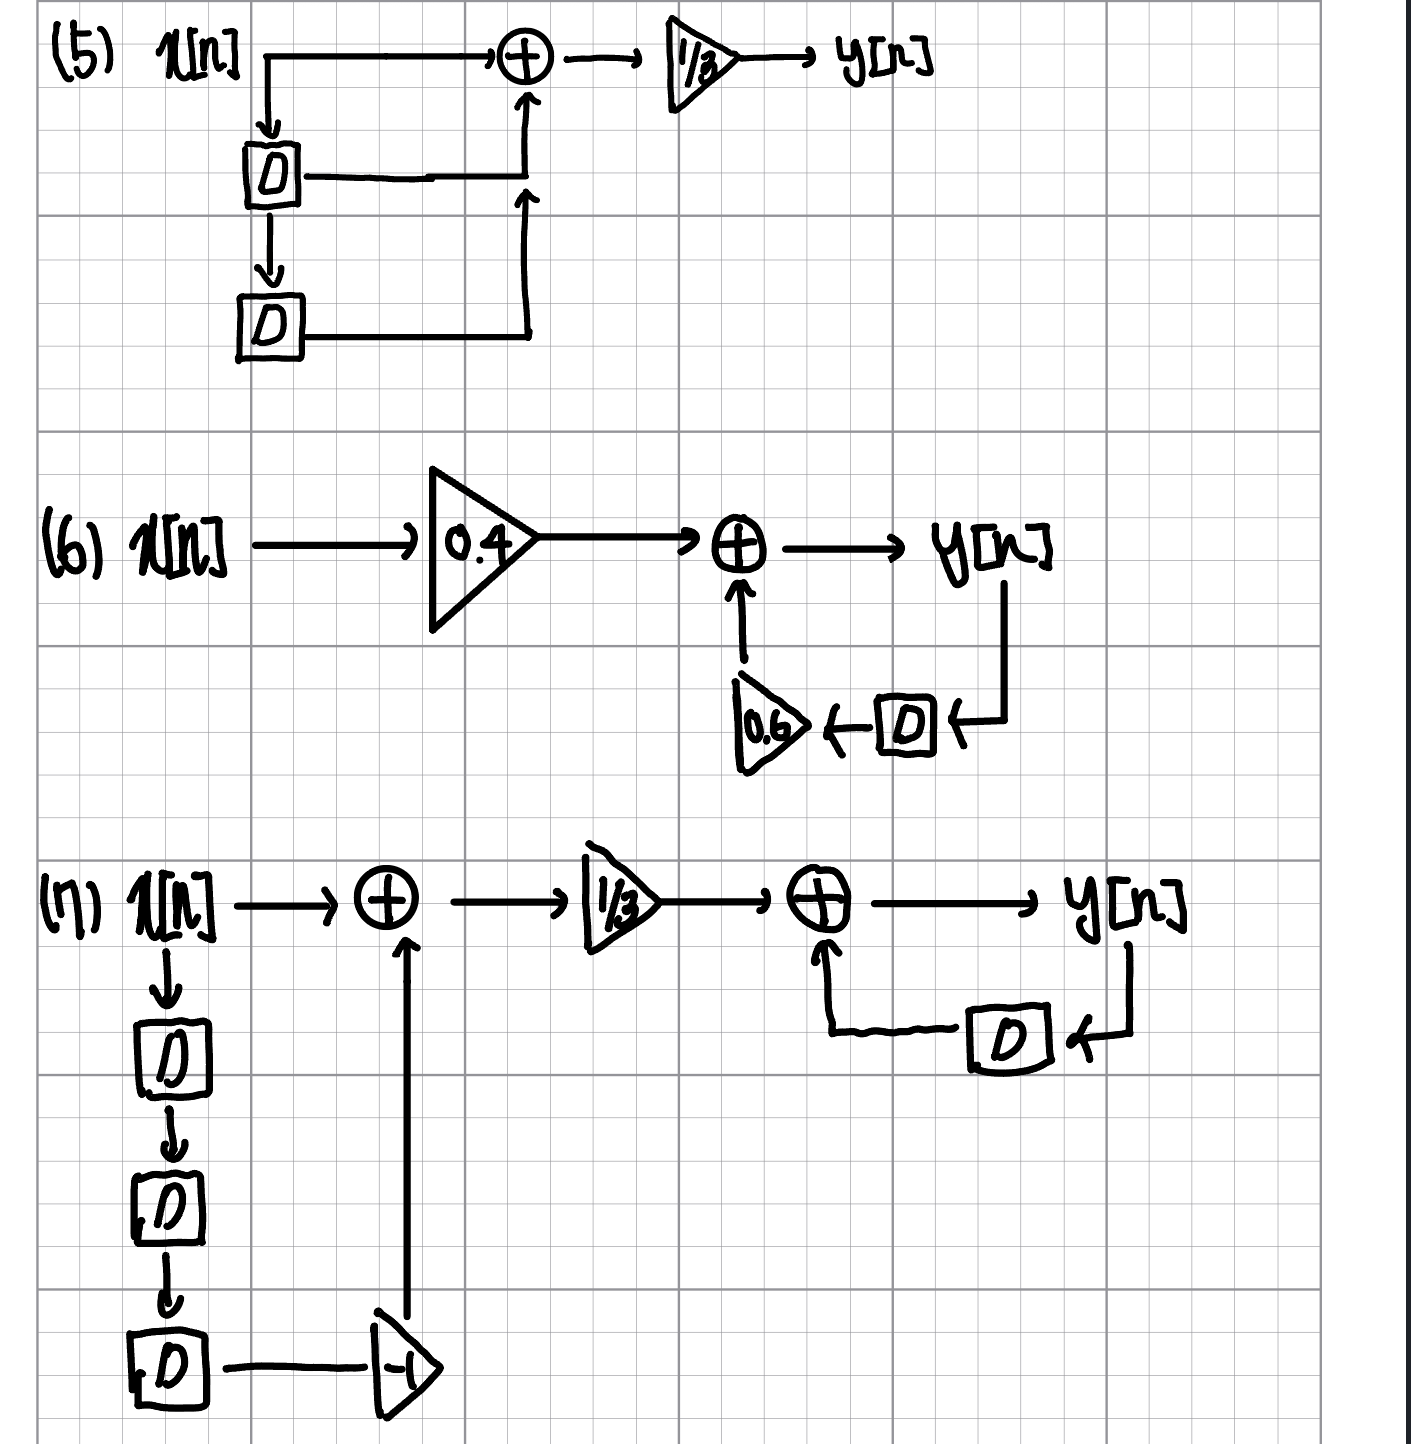

**3. Calculate the impulse response**

(5) h[n] = 1/3 * ($\delta$[n] + $\delta$[n - 1] + $\delta$[n - 2])
(6) h[n] = 0.4 * $0.6^n$ * u[n]
(7) h[n] = 1/3 * ($\delta$[n] + $\delta$[n - 1] + $\delta$[n - 2])

**4. Explain why methods (5) and (7) are known as moving average.**

From the impulse responses of methods (5) and (7), we see that the output depends only on the three most recent input samples. As time progresses, this three sample window shifts forward, continuously computing the average of the latest three values. Therefore, they are called moving averages.

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [191]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

Text(0.5, 1.0, 'Original signal')

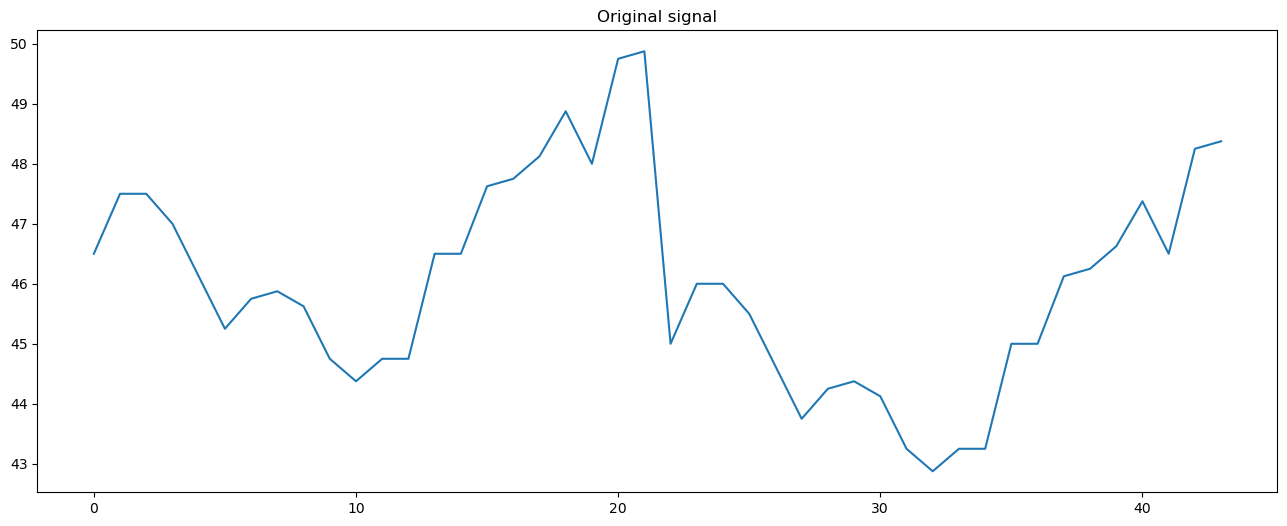

In [192]:
# write your code here
plt.plot(rate)
plt.title("Original signal")

**2. Plot the result of filtering with (6).**

Text(0.5, 1.0, 'Stockrates after filter 6')

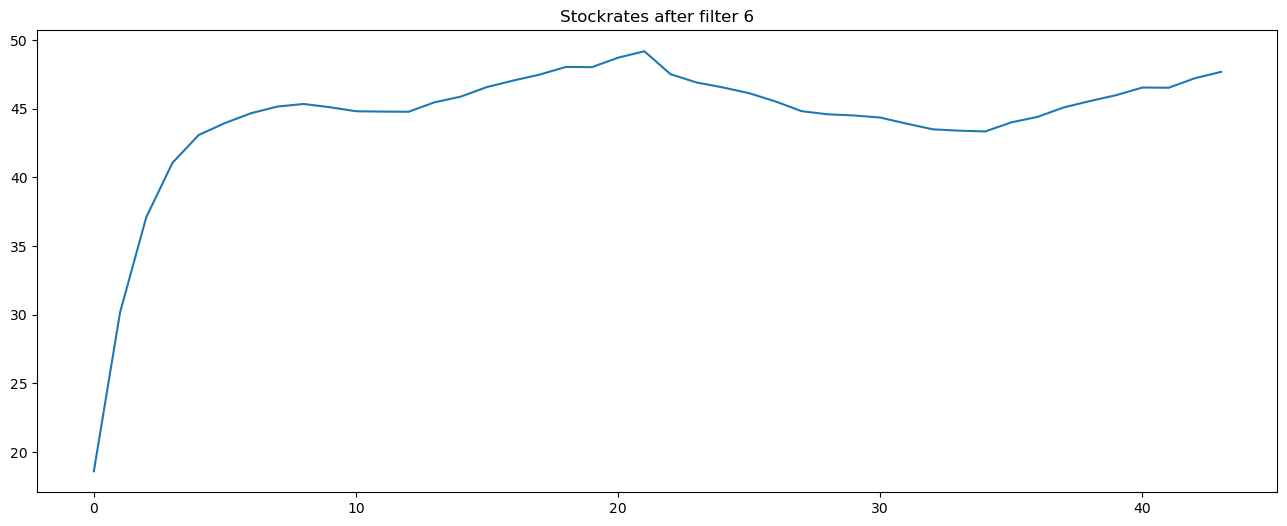

In [193]:
# write your code here
y6 = np.zeros_like(rate)

for n6 in range(len(y6)):
    if (n6 == 0):
        y6[n6] = 0.4 * rate[n6]
    else:
        y6[n6] = y6[n6 - 1] * 0.6 + 0.4 * rate[n6]
plt.plot(y6)
plt.title("Stockrates after filter 6")

**3. Plot the result of filtering with (7).**

Text(0.5, 1.0, 'Stockrates after filter 7')

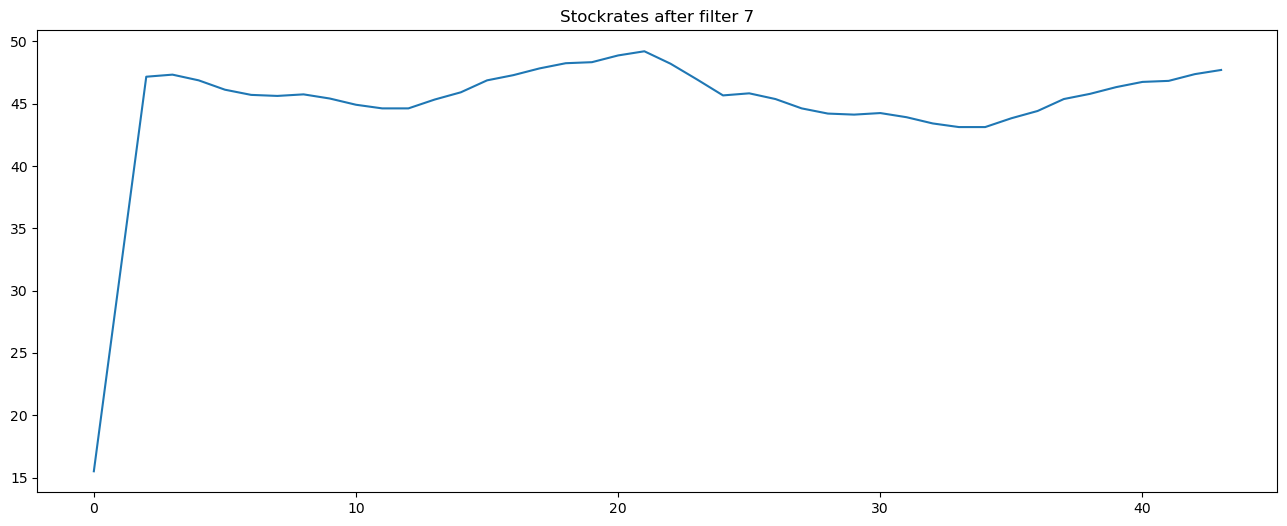

In [194]:
# write your code here
y7 = np.zeros_like(rate)
y7[0] = 1/3 * rate[0]

for n7 in range(1, len(y7)):
    if n7 >= 3:
        y7[n7] = y7[n7 - 1] + 1/3 * (rate[n7] - rate[n7 - 3])
    else:
        y7[n7] = y7[n7 - 1] + 1/3 * (rate[n7])
plt.plot(y7)
plt.title("Stockrates after filter 7")

**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

For filter (6), it produces a very smooth curve. The sharp drops and upward fluctuations are softened and almost removed. However, it responds more slowly to changes because it incorporates past values with exponential weighting.

For filter (7), it responds faster and removes most sharp variations by averaging the three most recent input samples. However, it provides less smoothing compared to filter (6) since it uses only a few samples, resulting in slightly higher variance. Additionally, it shows a small edge effect at the beginning due to initialization.

One remaining issue occurs at the beginning of the filtered signal due to initialization. To reduce this initialization issue and make the curve smoother, we can initialize the filter using the average of the first few samples instead of zero.